## Universidad Politecnica Salesiana
---
### Inteligencia Artificial

#### Boletin Practica3: ADALINE    
---
##### Realizado por:  Soa Vanessa Amendano Murillo

---

Fue desarrollado en 1960 por Wildrow y Hoff.

Su estructura se ha semeja al perceptron en donde su elemento combinador adaptativo lineal es el que recibe todas las entradas, la suma ponderadamente y produce una salida que es el numero real.

<img src="1.jpg">


### Arquitectura de la Red y sus reglas de aprendizaje 

Esta conformado por una capa de entrada y salida incluyendo una sola neurona.

<img src="0.jpg">

> + Los valores X1, x2 … Xn son las entradas de la neurona.
> + Los valores de W1, W2, …. Wn son los pesos asociados a las entradas.
> + Y el valor del lumbral de activación esta definido por θ.

Su funcion de activacion esta dada por:

<img src="0.1.jpg">

### Caracteristicas

+ Utiliza directamente la salida de red (real).
+ Utiliza la diferencia entre el valor real esperado y la salida producida de la red.
+ Se diferencia del perceptron en la manera que utiliza la salida en la regla de aprendizaje
+ Su objetivo es obtener una red tal que y^p = d^p para todos los patrones p
+ La regla de aprendizaje es la regla delta
+ Su idea es realizar un cambio en cada peso proporcionado por la derivada del error

En la arquitectura es imposible una salida exacta por su función lineal.

### Funcionamiento

Aquí se utiliza una función de error para todo el conjunto de patrones y así buscar el conjunto de pesos que minimiza la función de error. Es decir, trata de reducir el patrón cometido de los patrones de aprendizaje lo cual se lleva a cabo utilizando la diferencia de la salida deseada y producida. 

<img src="2.jpg">

Este proceso se realiza mediante un proceso iterativo presentando los patrones uno a uno, modificando los pesos y el umbral de la red mediante las reglas del descenso del gradiente.

Este método es un algoritmo creado para la optimización en el aprendizaje autónomo llamado regla delta, utilizado por lo general en las redes neuronales, este método ayuda a minimizar cualquier función, siendo versátil en casos de funciones multi-dimensionales. existe una versión del algoritmo que se utiliza más para casos de búsqueda del punto máximo de una función conocido como una versión bizarra del descenso del gradiente.

En donde se aplica la regla de la cadena quedando:

<img src="3.jpg">

### Diferencias entre Perceptron VS Adaline


| Tipo                 | Perceptron                    | Adaline                             |              
| -------------------- | ----------------------------- |:-----------------------------------:|
| Salida               |Binaria                        |real                                 |
| Medida               |Indica que se a equivocado o no|Cuanto se a equivocado la red        |
| Razon de Aprendizaje |Valor entre 0 y 1              |Afecta según los errores de los peso | 
|Tipo de problema      | Clasificacion Lineal          | Regresion Lineal                    |

### Regla de Aprendizaje

El proceso de aprendizaje consiste en los siguientes pasos:

+ Inicializamos los pesos y ubral todo de forma aleatoria
+ Presenta un patron de entrada
+ Calculamos la salida y la comparamos tanto con la deseada obteniendo la diferencia

<img src="5.jpg">

+ Calculamos los pesos y el umbral con las siguientes formulas

<img src="6.jpg">

+ Modificamos los pesos y el umbral con las siguientes formulas 

<img src="7.jpg">

+ Repetimos los pasos 2, 3, 4 y 5 para cada uno de los patrones de entrenamiento
+ Repetimos los pasos 2, 3, 4, 5 y 6 tantos ciclos hasta cumplir el criterio de parada

### Criterios de Parada

+ Fijar un numero de ciclos máximo, esto garantiza que el error cuadrático se haya estabilizado 
+ Cuando el patrón no cambia en n ciclos
+ En el caso de utilizar un conjunto de validaciones, el criterio cambia cuando un error cuadrático sobre los patrones de validación no aumenta o se mantiene en n ciclos.

### Proceso de Entrenamiento

+ Se presenta los patrones de entrenamiento
+ Se evalua el error cuadrático
+ Se presenta los patrones de validación
+ Se presenta el error cuadrático medio dentro del conjunto de validación
+ Se repite los pasos 1, 2, 3 y 4  hasta el criterio de parada en dode el error de entrenamiento debe irse reduciendo y el error de validcion de igual forma, en donde se considera el aumento de los ciclos.

### Ejemplo

+ Implementacion de una neurona lineal adaptativa en Python






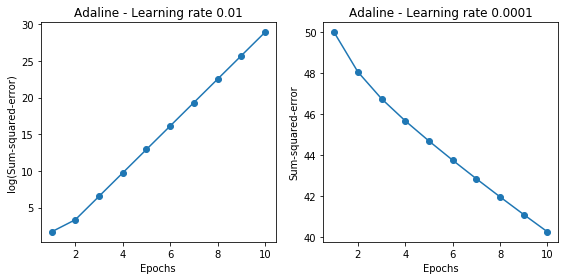

In [8]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

+ Adaline - Pendiente de Gradiente

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


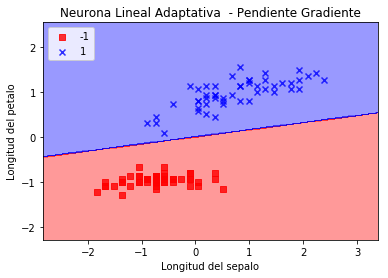

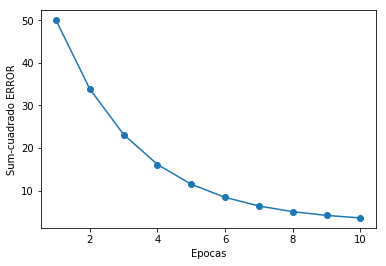

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / 2.0
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def activation(self, X):
      """Compute linear activation"""
      return self.net_input(X)

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(X) >= 0.0, 1, -1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

# standardize
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

# learning rate = 0.01
aln = AdaptiveLinearNeuron(0.01, 10)
aln.fit(X_std,y)

# decision region plot
plot_decision_regions(X_std, y, classifier=aln)

plt.title('Neurona Lineal Adaptativa  - Pendiente Gradiente')
plt.xlabel('Longitud del sepalo')
plt.ylabel('Longitud del petalo')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(aln.cost) + 1), aln.cost, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Sum-cuadrado ERROR')
plt.show()

+ Ejemplo de la implementacion simplificada de la pendiente de gradiente, en donde el clasificador AdalineGD se utiliza como plantilla para convertirlo en un clasificador de regresion logistica.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


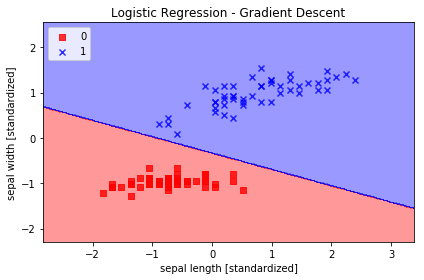

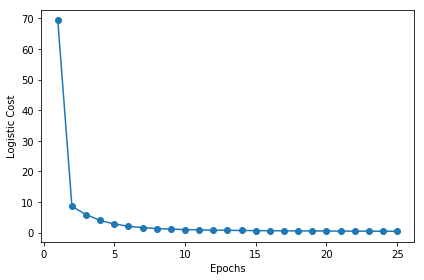

In [6]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, 0)

    def activation(self, X):
        z = self.net_input(X)
        sigmoid = 1.0 / (1.0 + np.exp(-z))
        return sigmoid
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data[:100, [0, 2]], iris.target[:100]

X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

lr = LogisticRegressionGD(n_iter=25, eta=0.15)
lr.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(lr.cost_) + 1), lr.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

+ Ejemplo Calculo
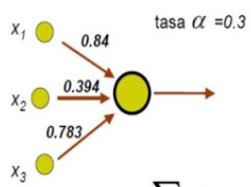

$\left( \begin{matrix} \begin{matrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 0 & 1 & 1 \end{matrix} \\ \begin{matrix} 1 & 0 & 0 \\ 1 & 0 & 1 \\ 1 & 1 & 0 \end{matrix} \\ \begin{matrix} 1 & 1 & 1 \end{matrix} \end{matrix} \right) =\vee f$

(1)

y=0.84(0)+0.394(0)+0.783(1)=0.783


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =1-0.789=0.217$

${ w }_{ 1 }=0.84\\ { w }_{ 2 }=0.394\\ { w }_{ 3 }=0.783+0.3(0.217)=0.848$

(2)

y=0.84(0)+0.394(1)+0.783(1)=0.394


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =2-0.394=1.61$

${ w }_{ 1 }=0.84\\ { w }_{ 2 }=0.394+0.3(1.61)=0.876\\ { w }_{ 3 }=0.848$

(3)

y=0.84(0)+0.394(1)+0.783(1)=2.017


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =3-2.017=0.983$

${ w }_{ 1 }=0.84\\ { w }_{ 2 }=0.394+0.3(0.983)=0.6889\\ { w }_{ 3 }=0.848+0.3(0.983)=1.142$

(4)

y=0.84(1)+0.394(0)+0.783(0)=0.84


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =4-0.84=3.16$

${ w }_{ 1 }=0.84+0.3(3.16)=1.788\\ { w }_{ 2 }=0.394\\ { w }_{ 3 }=0.848$

(5)

y=0.84(1)+0.394(0)+0.783(1)=1.623


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =5-1.623=3.377$

${ w }_{ 1 }=0.84+0.3(3.377)=1.853\\ { w }_{ 2 }=0.394\\ { w }_{ 3 }=0.848+0.3(3.377)=1.8611$

(6)

y=0.84(1)+0.394(1)+0.783(0)=1.234


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =6-1.234=4.766$

${ w }_{ 1 }=0.84+0.3(4.766)=2.269\\ { w }_{ 2 }=0.394+0.3(4.766)=1.823\\ { w }_{ 3 }=0.848$

(7)

y=0.84(1)+0.394(1)+0.783(1)=0.783


$e=\sum { ({ d }_{ p }{ y }_{ p }) } =7-6.881=0.12$

${ w }_{ 1 }=0.84+0.3(0.12)=3.12\\ { w }_{ 2 }=0.394+0.3(0.12)=2.002\\ { w }_{ 3 }=0.783+0.3(0.12)=1.861$

Resultado:

$\begin{matrix} \begin{matrix} 3.12 & 2 & 1.86 \\ 3.61 & 1.98 & 1.42 \\ 3.82 & 1.98 & 1.2 \end{matrix} \\ \begin{matrix} 3.92 & 1.98 & 1.2 \\ 3.96 & 1.99 & 1.1 \\ 3.99 & 2.00 & 1.02 \end{matrix} \\ \begin{matrix} \begin{matrix} 4.00 & 2.00 & 1.00 \\ 4.00 & 2.00 & 1.00 \\ 4.00 & 2.00 & 1.00 \end{matrix} \\ \begin{matrix} 4.00 & 2.00 & 1.00 \end{matrix} \end{matrix} \end{matrix}$



### Referencias

1. http://ocw.uc3m.es/ingenieria-informatica/redes-de-neuronas/transparencias/Tema2%20PerceptronAdalineRN.pdf
2. http://rnadaline.blogspot.com/2017/05/red-adaline.html
3. http://dianainteligenciaartificial.blogspot.com/2015/07/red-adaline.html
4. https://zero.sci-hub.tw/3474/29b6851b2daccf5ab55cb23bc613a631/abdeslam2005.pdf?download=true
5. https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb
6. https://dspace.ups.edu.ec/bitstream/123456789/4098/1/UPS-CT002584.pdf